# Working with the Pewlett-Hackard database in Pandas

In [95]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

### Connect to db

In [129]:
conn = psycopg2.connect(host="localhost", port = 5432, database="pewlett_hackard", user="scottgall")

cur = conn.cursor()

### Function that takes in PostgresQL query and outpus pandas dataframe

In [130]:
def create_pandas_table(sql_query, database = conn):
    table = pd.read_sql_query(sql_query, database)
    return table

### Create a histogram to visualize the most common salary ranges for employees

In [131]:
salaries_df = create_pandas_table("""
    SELECT s.salary
    FROM employees as e
    JOIN salaries as s
    ON e.id = s.emp_id
    ORDER BY s.salary DESC
""")
salaries_df

,salary
0,129492
1,127238
2,127041
3,126703
4,125469
...,...
300019,40000
300020,40000
300021,40000
300022,40000


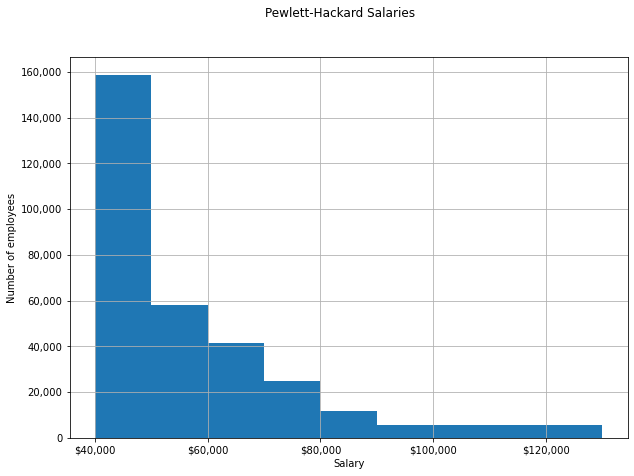

In [133]:
bins = [40000, 50000, 60000, 70000, 80000, 90000, 130000]
fig, ax = plt.subplots()
ax.hist(salaries_df, bins)
fig.set_size_inches(10,7)
fig.suptitle('Pewlett-Hackard Salaries')
ax.set_xlabel('Salary')
ax.set_ylabel('Number of employees')
ax.xaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.set_major_formatter('{x:,.0f}')
ax.grid()
fig.savefig('images/salaries_hist.png')

### Create a bar chart of average salary by title

In [134]:
title_salary_df = create_pandas_table("""
    SELECT t.title, AVG(s.salary) as "Average salary"
    FROM employees as e
    JOIN salaries as s
    ON e.id = s.emp_id
    JOIN titles as t
    ON e.title_id = t.id
    GROUP BY t.title
    ORDER BY "Average salary" DESC
""")
title_salary_df

,title,Average salary
0,Senior Staff,58550.172704
1,Staff,58465.382850
2,Manager,51531.041667
3,Technique Leader,48582.896092
4,Assistant Engineer,48564.434447
5,Engineer,48535.336511
6,Senior Engineer,48506.799871


<ipython-input-135-7945d3b2117e>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(title_salary_df['title'],rotation = 45,ha='right')


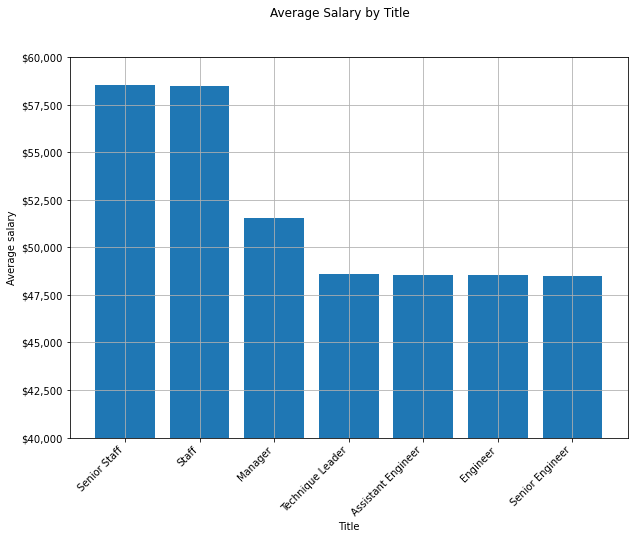

In [135]:
fig, ax = plt.subplots()
ax.bar(title_salary_df['title'], title_salary_df['Average salary'])
fig.set_size_inches(10,7)
fig.suptitle('Average Salary by Title')
ax.set_xlabel('Title')
ax.set_ylabel('Average salary')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.set_xticklabels(title_salary_df['title'],rotation = 45,ha='right')
ax.set_ylim([40000, 60000])
ax.grid()
fig.savefig('images/average_salaries.png')


### Close connection

In [136]:
cur.close()
conn.close()